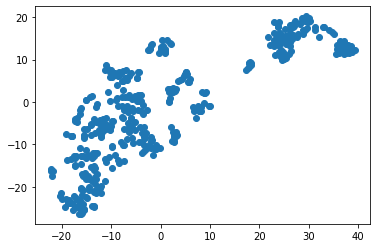

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

boston = load_boston()
data = boston.data

feature_names = boston.feature_names

X = pd.DataFrame(data, columns = feature_names)
price = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

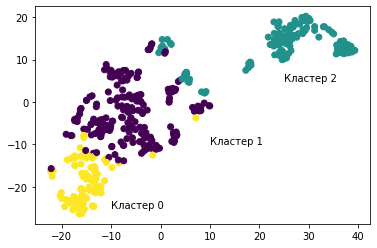

Средняя цена 0 кластера:  24.958115183246072
Средняя цена 1 кластера:  16.165354330708663
Средняя цена 2 кластера:  27.78837209302326


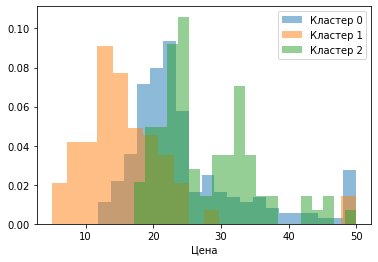

Средняя преступность 0 кластера:  0.42166020942408367
Средняя преступность 1 кластера:  10.797028425196853
Средняя преступность 2 кластера:  0.07356558139534886


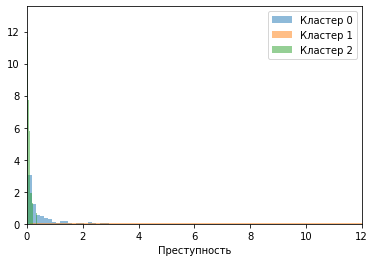

In [5]:
#Задание 2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.text(-10, -25, 'Кластер 0')
plt.text(10, -10, 'Кластер 1')
plt.text(25, 5, 'Кластер 2')
plt.show()

print('Средняя цена 0 кластера: ', y_train[labels_train == 0].mean())
print('Средняя цена 1 кластера: ', y_train[labels_train == 1].mean())
print('Средняя цена 2 кластера: ', y_train[labels_train == 2].mean())

plt.hist(y_train[labels_train == 0], bins = 20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train == 1], bins = 20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train == 2], bins = 20, density = True, alpha = 0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.show()

print('Средняя преступность 0 кластера: ', X_train.loc[labels_train == 0, 'CRIM'].mean())
print('Средняя преступность 1 кластера: ', X_train.loc[labels_train == 1, 'CRIM'].mean())
print('Средняя преступность 2 кластера: ', X_train.loc[labels_train == 2, 'CRIM'].mean())

plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Преступность')
plt.show()